In [4]:
from astropy.io import ascii
from matplotlib import pyplot as plt
import numpy as np
from statistics import median,mean
from math import nan, isnan
from astropy.table import Table, QTable, vstack
from astropy import units as u
from statistics import mean, stdev
import pandas as pd
from astropy.coordinates import SkyCoord

In [ ]:
# google colab read file in:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

# after mounting drive, copy the path of the directory where the files are stored
save_path='/content/drive/MyDrive/NOFS copy/WiserLabBackup/QueryResults'

In [7]:

ast ='{0}/associated_systems_table_fixed4-20.csv'.format(save_path)
nast = '{0}/non_associated_systems_table_fixed4-20.ecsv'.format(save_path)
associated_systems_table = QTable.read(ast, header_start=0, data_start=1)
non_associated_systems_table = QTable.read(nast, header_start=0, data_start=1)


associated_systems_table_unitless = Table.read(ast, header_start=0, data_start=1)
non_associated_systems_table_unitless = Table.read(nast, header_start=0, data_start=1)

In [ ]:
all = vstack([associated_systems_table['wds_identifier'], non_associated_systems_table['wds_identifier']])
unique_ids = np.unique(all)

In [ ]:
len(unique_ids)

77149

In [ ]:
associated_systems_table[-1]

wds_identifier,wds_rownum,source_id_a,source_id_b,ref_epoch_a,ref_epoch_b,ra_a,ra_b,ra_error_a,ra_error_b,dec_a,dec_b,dec_error_a,dec_error_b,parallax_a,parallax_b,parallax_error_a,parallax_error_b,parallax_over_error_a,parallax_over_error_b,pmra_a,pmra_b,pmra_error_a,pmra_error_b,pmdec_a,pmdec_b,pmdec_error_a,pmdec_error_b,radial_velocity_a,radial_velocity_b,radial_velocity_error_a,radial_velocity_error_b,astrometric_params_solved_a,astrometric_params_solved_b,visibility_periods_used_a,visibility_periods_used_b,astrometric_sigma5d_max_a,astrometric_sigma5d_max_b,ruwe_a,ruwe_b,phot_g_mean_mag_a,phot_g_mean_mag_b,phot_g_mean_flux_over_error_a,phot_g_mean_flux_over_error_b,phot_bp_mean_mag_a,phot_bp_mean_mag_b,phot_bp_mean_flux_over_error_a,phot_bp_mean_flux_over_error_b,phot_rp_mean_mag_a,phot_rp_mean_mag_b,phot_rp_mean_flux_over_error_a,phot_rp_mean_flux_over_error_b,bp_rp_a,bp_rp_b,phot_bp_rp_excess_factor_a,phot_bp_rp_excess_factor_b,separation,delta_mu_orbit,delta_mu_ra2,delta_mu_dec2,delta_mu,sigma_delta_mu
str13,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
00001+7727LOC,6,540288988710861824,540288988710861952,2016.0,2016.0,0.025039271133275212,0.03472491134344492,0.050575174391269684,0.013834286481142044,77.44280871485321,77.44362726856326,0.04344682767987251,0.01188855990767479,6.7716161348462895,6.894360456576272,0.05322949215769768,0.014487730339169502,127.21549224853516,475.8758239746094,85.8194419212781,85.46432115647032,0.06538749486207962,0.017955169081687927,36.5657437504867,36.795972656600284,0.05974858999252319,0.016469508409500122,nan,-27.13381004333496,nan,8.205977439880371,31.0,31.0,25.0,25.0,0.09252406656742096,0.025319892913103104,1.21744704246521,1.072059154510498,16.57539176940918,14.10311508178711,904.2947387695312,1744.7960205078125,18.147706985473633,15.268089294433594,80.51824951171875,421.7792663574219,15.334451675415039,13.029826164245605,532.9720458984375,699.989501953125,2.8132553100585938,2.2382631301879883,1.4904694557189941,1.3791841268539429,8.13322312188097,22.71564110834343,1.178308274619283,0.05300534921025606,1.1096457199617988,0.0686100192383481


In [ ]:
def hist(df,x, xlim_low=0, xlow=0, xhigh=100, color='blue', bins=100, markersize=0.3):
  x = df[x]

  plt.hist(x, bins=bins)

  plt.xlim([xlow,xhigh])

  plt.show()


In [ ]:
def plot_it(df,x, y, xlim_low=0, xlow=0, xhigh=100, ylow=0, yhigh=100, color='blue', markersize=0.3):
  #plt.style.use('seaborn-dark-palette')

  xp =  df[x]
  yp =  df[y]


  plt.xlim([xlow, xhigh])
  plt.ylim([ylow, yhigh])
  plt.plot(xp, yp, '.', markersize=markersize, color=color)
  plt.show()

In [ ]:
def plot_them( x, y,df1 =associated_systems_table, df2 = non_associated_systems_table, x2=0, y2=0, xlim_low=0, xlow=0, xhigh=100, ylow=0, yhigh=100, color1='blue', color2='magenta', markersize=0.2):
  #plt.style.use('seaborn-dark-palette')

  if x2==0:
    x2=x
  if y2==0:
    y2=y

  xp1 =  df1[x]
  yp1 =  df1[y]

  xp2 = df2[x2]
  yp2 = df2[y2]

  plt.xlim([xlow, xhigh])
  plt.ylim([ylow, yhigh])
  plt.plot(xp2, yp2, '.', markersize=markersize, color=color2)
  plt.plot(xp1, yp1, '.', markersize=markersize, color=color1)

  plt.xlabel=x
  plt.ylabel=y
  plt.legend(['associated_systems', 'non_associated_systems'], loc ="upper right", markerscale = 24)
  plt.show()

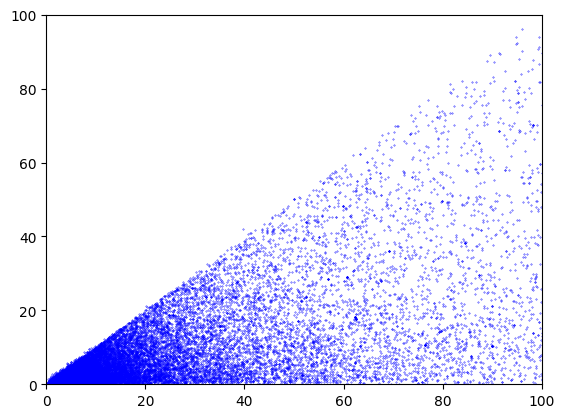

In [ ]:
plot_it(associated_systems_table, x='delta_mu_orbit', y='delta_mu', markersize=0.6)

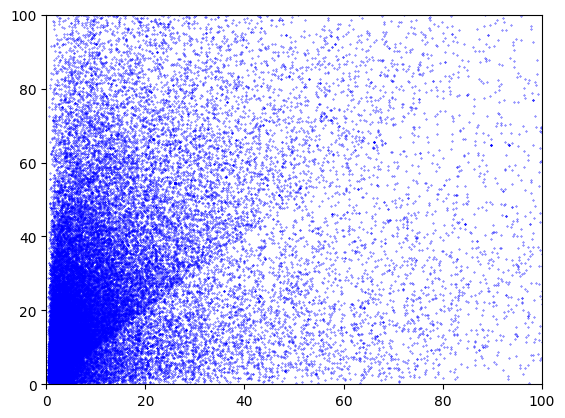

In [ ]:
plot_it(non_associated_systems_table, x='delta_mu_orbit', y='delta_mu', markersize=0.6)

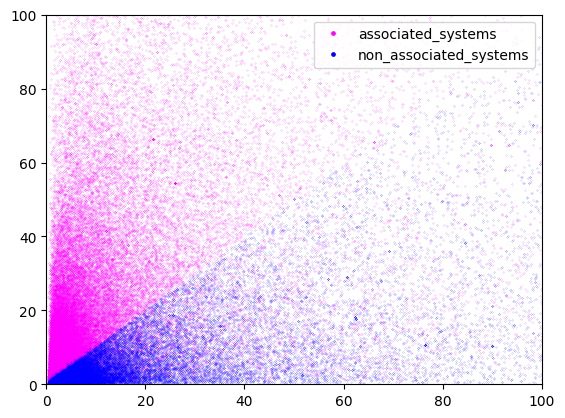

In [ ]:
plot_them(x='delta_mu_orbit', y='delta_mu', markersize=0.2)

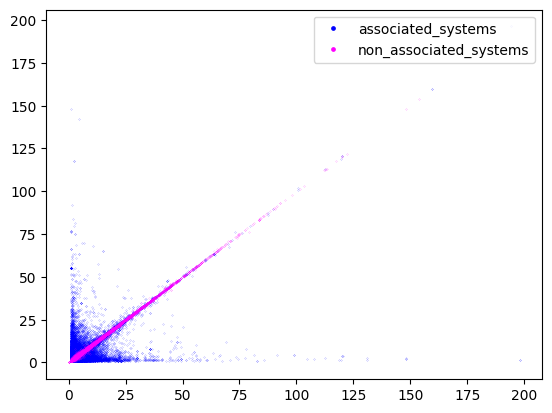

In [ ]:
#plt.style.use('seaborn-dark-palette')



xp1 =  associated_systems_table['parallax_a']
yp1 =  associated_systems_table['parallax_b']

xp2 = non_associated_systems_table['parallax_a']
yp2 = non_associated_systems_table['parallax_b']

# plt.xlim([xlow, xhigh])
# plt.ylim([ylow, yhigh])
plt.plot(xp2, yp2, '.', markersize=0.2, color='blue')
plt.plot(xp1, yp1, '.', markersize=0.2, color='magenta')

# plt.xlabel=x
# plt.ylabel=y
plt.legend(['associated_systems', 'non_associated_systems'], loc ="upper right", markerscale = 24)
plt.show()

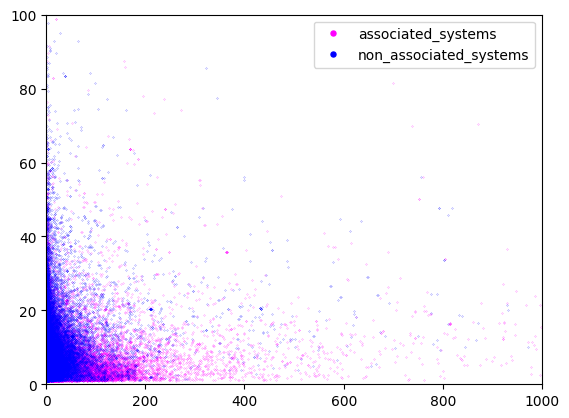

In [ ]:
plot_them(x='separation', y='parallax_a', markersize=0.3, xhigh=1000)

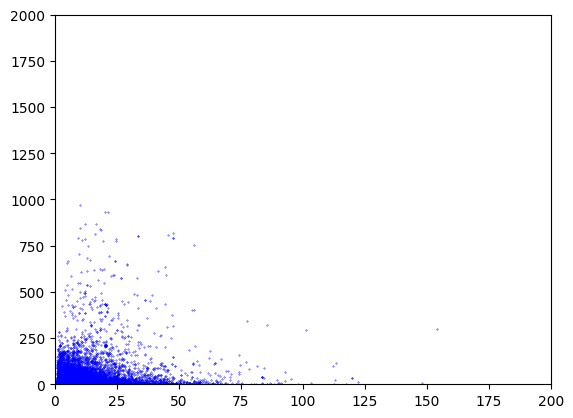

In [ ]:
plot_it(associated_systems_table, x='parallax_a', y='separation', markersize=0.6, ylow = 0, yhigh=2000, xhigh=200)

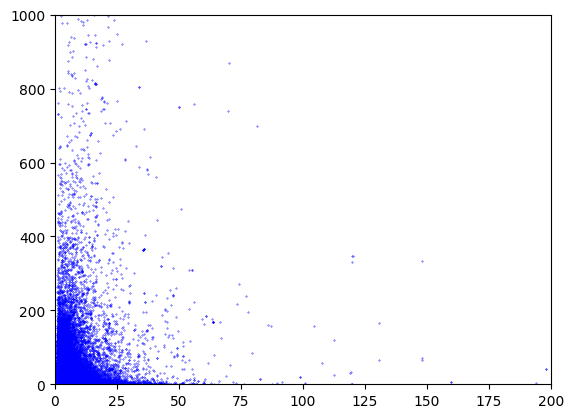

In [ ]:
plot_it(non_associated_systems_table, x='parallax_a', y='separation', markersize=0.6, ylow = 0, yhigh=1000, xhigh=200)

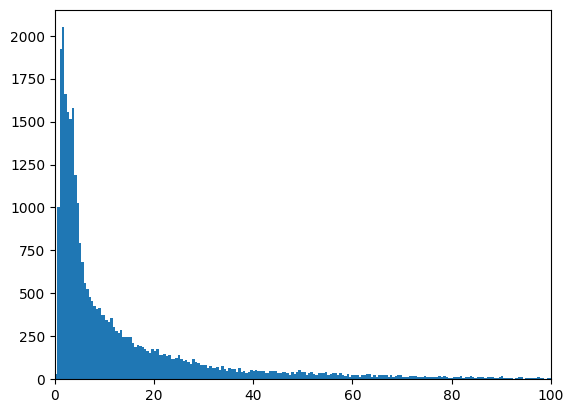

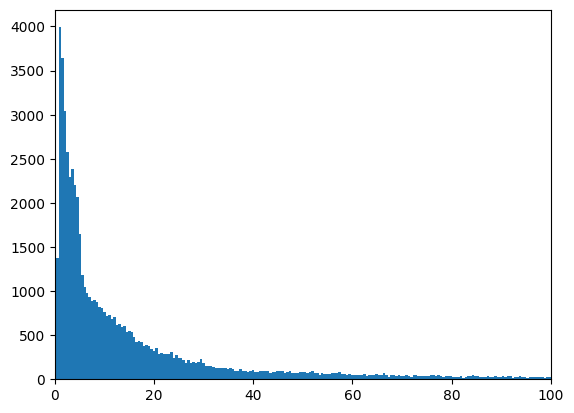

In [ ]:
hist(associated_systems_table,x='separation',xhigh=100, bins=2000)
hist(non_associated_systems_table,x='separation',xhigh=100, bins=2000)

In [ ]:
non_associated_systems_table.info

<QTable length=61983>
             name               dtype     unit     class   n_bad
------------------------------ ------- ---------- -------- -----
                wds_identifier   str13              Column     0
                    wds_rownum   int64              Column     0
                   source_id_a   str19              Column     0
                   source_id_b   str19              Column     0
                   ref_epoch_a float64              Column     0
                   ref_epoch_b float64              Column     0
                          ra_a float64        deg Quantity     0
                          ra_b float64        deg Quantity     0
                    ra_error_a float64        mas Quantity     0
                    ra_error_b float64        mas Quantity     0
                         dec_a float64        deg Quantity     0
                         dec_b float64        deg Quantity     0
                   dec_error_a float64        mas Quantity     0
   